In [1]:
%matplotlib notebook
%config InlineBackend.figure_format ='svg'
from ipywidgets import Layout, widgets
from IPython.display import clear_output, display
import Fumagalli_Motta_Tarantino_2020 as FMT20


class Interactive:
    m1 = FMT20.OptimalMergerPolicy()
    m2 = FMT20.OptimalMergerPolicy()


def create_float_input(
    value: float, description: str, min_value=0.0, max_value=1.0, step=0.01
) -> widgets.BoundedFloatText:
    return widgets.BoundedFloatText(
        value=value,
        min=min_value,
        max=max_value,
        step=step,
        description=description,
        disabled=False,
    )


def get_model_type(m: str) -> type(FMT20.OptimalMergerPolicy):
    if m == FMT20.IVisualize.get_model_label(FMT20.OptimalMergerPolicy):
        return FMT20.OptimalMergerPolicy
    if m == FMT20.IVisualize.get_model_label(FMT20.ProCompetitive):
        return FMT20.ProCompetitive
    if m == FMT20.IVisualize.get_model_label(FMT20.ResourceWaste):
        return FMT20.ResourceWaste
    if m == FMT20.IVisualize.get_model_label(FMT20.PerfectInformation):
        return FMT20.PerfectInformation
    if m == FMT20.IVisualize.get_model_label(FMT20.CournotCompetition):
        return FMT20.CournotCompetition
    if m == FMT20.IVisualize.get_model_label(FMT20.EquityContract):
        return FMT20.EquityContract
    raise NotImplementedError("No such model type available")


def get_visualizers(v: str) -> (type(FMT20.IVisualize), type(FMT20.IVisualize)):
    if v == "Timeline":
        return FMT20.Timeline, FMT20.Timeline
    if v == "Payoffs":
        return FMT20.Payoffs, FMT20.Payoffs
    return asset_range_visualizer(Interactive.m1), asset_range_visualizer(
        Interactive.m2
    )


def asset_range_visualizer(
    m: type(FMT20.OptimalMergerPolicy),
) -> type(FMT20.MergerPoliciesAssetRange):
    print(m == type(FMT20.PerfectInformation))
    if isinstance(m, FMT20.PerfectInformation):
        return FMT20.MergerPoliciesAssetRangePerfectInformation
    return FMT20.MergerPoliciesAssetRange


def get_distribution(dist: str) -> type(FMT20.Distributions.NormalDistribution):
    if dist == FMT20.NotebookUtilities.get_distribution_labels(
        FMT20.Distributions.NormalDistribution
    ):
        return FMT20.Distributions.NormalDistribution
    return FMT20.Distributions.UniformDistribution


model = widgets.Dropdown(
    options=[
        FMT20.IVisualize.get_model_label(FMT20.OptimalMergerPolicy),
        FMT20.IVisualize.get_model_label(FMT20.ProCompetitive),
        FMT20.IVisualize.get_model_label(FMT20.ResourceWaste),
        FMT20.IVisualize.get_model_label(FMT20.PerfectInformation),
        FMT20.IVisualize.get_model_label(FMT20.CournotCompetition),
        FMT20.IVisualize.get_model_label(FMT20.EquityContract),
    ],
    description="Model",
)
merger_policy = widgets.Dropdown(
    options=[
        FMT20.MergerPolicies.Strict,
        FMT20.MergerPolicies.Intermediate_late_takeover_prohibited,
        FMT20.MergerPolicies.Intermediate_late_takeover_allowed,
        FMT20.MergerPolicies.Laissez_faire,
    ],
)
distribution = widgets.Dropdown(
    options=[
        FMT20.NotebookUtilities.get_distribution_labels(
            FMT20.Distributions.NormalDistribution
        ),
        FMT20.NotebookUtilities.get_distribution_labels(
            FMT20.Distributions.UniformDistribution
        ),
    ],
    description="Distribution",
)
figure_type = widgets.ToggleButtons(
    options=["Overview", "Comparison"],
    tooltips=["Show overview for model 1", "Compare model 1 and 2"],
)
active_model = widgets.Dropdown(
    options=["Change model 1 (on the left)", "Change model 2 (on the right)"],
    disabled=True,
)
plot_type = widgets.Dropdown(
    options=["Merger Policies", "Timeline", "Payoffs"],
    disabled=True,
    description="Visualization",
)

development_costs = create_float_input(0.1, "$K$")
startup_assets = create_float_input(0.05, "$A$")
success_probability = create_float_input(0.7, "$p$")
private_benefit = create_float_input(0.05, "$B$")
consumer_surplus_without_innovation = create_float_input(0.2, "$CS^m$")
incumbent_profit_without_innovation = create_float_input(0.4, "$\\pi^m_I$")
consumer_surplus_duopoly = create_float_input(0.5, "$CS^d$")
incumbent_profit_duopoly = create_float_input(0.2, "$\\pi^d_I$")
startup_profit_duopoly = create_float_input(0.2, "$\\pi^d_S$")
consumer_surplus_with_innovation = create_float_input(0.3, "$CS^M$")
incumbent_profit_with_innovation = create_float_input(0.5, "$\\pi^M_I$")
gamma = create_float_input(0.3, "$\\gamma$")
development_outcome = widgets.Checkbox(
    value=True, description="Attempted development successful?"
)

configurations = widgets.Dropdown(
    description="Configuration",
    options=FMT20.NotebookUtilities.get_configurations(),
)
button = widgets.Button(
    description="draw", button_style="info", layout=Layout(width="300px", height="auto")
)

input_widgets = [
    development_outcome,
    development_costs,
    startup_assets,
    success_probability,
    private_benefit,
    consumer_surplus_without_innovation,
    incumbent_profit_without_innovation,
    consumer_surplus_duopoly,
    incumbent_profit_duopoly,
    startup_profit_duopoly,
    consumer_surplus_with_innovation,
    incumbent_profit_with_innovation,
    gamma,
    model,
    merger_policy,
    distribution,
    configurations,
    figure_type,
    active_model,
    plot_type,
    button,
    widgets.Label(""),
    widgets.Label(""),
    widgets.Label("Note: Save parameter changes by clicking 'draw'"),
]

grid = widgets.GridBox(
    input_widgets, layout=widgets.Layout(grid_template_columns="repeat(3, 315px)")
)


def set_configuration(e):
    config_list = configurations.value.split(" - ")
    config = FMT20.LoadParameters(config_id=int(config_list[0]))
    model.value = config_list[1]
    development_costs.value = config.params.get("development_costs")
    startup_assets.value = config.params.get("startup_assets")
    success_probability.value = config.params.get("success_probability")
    private_benefit.value = config.params.get("private_benefit")
    consumer_surplus_without_innovation.value = config.params.get(
        "consumer_surplus_without_innovation"
    )
    incumbent_profit_without_innovation.value = config.params.get(
        "incumbent_profit_without_innovation"
    )
    consumer_surplus_duopoly.value = config.params.get("consumer_surplus_duopoly")
    incumbent_profit_duopoly.value = config.params.get("incumbent_profit_duopoly")
    startup_profit_duopoly.value = config.params.get("startup_profit_duopoly")
    consumer_surplus_with_innovation.value = config.params.get(
        "consumer_surplus_with_innovation"
    )
    incumbent_profit_with_innovation.value = config.params.get(
        "incumbent_profit_with_innovation"
    )


def load_active_model_parameters(m: FMT20.OptimalMergerPolicy) -> None:
    model.value = FMT20.IVisualize.get_model_label(type(m))
    development_costs.value = m.development_costs
    startup_assets.value = m.startup_assets
    success_probability.value = m.success_probability
    development_outcome.value = m.development_success
    private_benefit.value = m.private_benefit
    consumer_surplus_without_innovation.value = m.cs_without_innovation
    incumbent_profit_without_innovation.value = m.incumbent_profit_without_innovation
    consumer_surplus_duopoly.value = m.cs_duopoly
    incumbent_profit_duopoly.value = m.incumbent_profit_duopoly
    startup_profit_duopoly.value = m.startup_profit_duopoly
    consumer_surplus_with_innovation.value = m.cs_with_innovation
    incumbent_profit_with_innovation.value = m.incumbent_profit_with_innovation
    distribution.value = FMT20.NotebookUtilities.get_distribution_labels(
        m.asset_distribution
    )
    merger_policy.value = m.merger_policy


def change_active_model(e):
    if "1" in active_model.value:
        load_active_model_parameters(Interactive.m1)
    else:
        load_active_model_parameters(Interactive.m2)


def set_active_widgets(e):
    if figure_type.value == "Overview":
        plot_type.disabled = True
        active_model.disabled = True
        active_model.value = "Change model 1 (on the left)"
    else:
        plot_type.disabled = False
        active_model.disabled = False


def get_models(model_type: type(FMT20.OptimalMergerPolicy), **kwargs):
    if figure_type.value == "Overview" or "1" in active_model.value:
        Interactive.m1 = model_type(**kwargs)
    else:
        Interactive.m2 = model_type(**kwargs)


plot_kwargs = {
    "figure_title": "",
    "thresholds": True,
    "optimal_policy": True,
    "y_offset": -35,
    "fontsize": 5,
    "parameter_number": 4,
}


def draw_figure(e):
    model_kwargs = {
        "merger_policy": merger_policy.value,
        "development_costs": development_costs.value,
        "startup_assets": startup_assets.value,
        "development_success": development_outcome.value,
        "success_probability": success_probability.value,
        "private_benefit": private_benefit.value,
        "consumer_surplus_without_innovation": consumer_surplus_without_innovation.value,
        "incumbent_profit_without_innovation": incumbent_profit_without_innovation.value,
        "consumer_surplus_duopoly": consumer_surplus_duopoly.value,
        "incumbent_profit_duopoly": incumbent_profit_duopoly.value,
        "startup_profit_duopoly": startup_profit_duopoly.value,
        "consumer_surplus_with_innovation": consumer_surplus_with_innovation.value,
        "incumbent_profit_with_innovation": incumbent_profit_with_innovation.value,
        "asset_distribution": get_distribution(distribution.value),
    }
    try:
        model_type = get_model_type(model.value)
        clear_output()
        display(grid)
        get_models(model_type, **model_kwargs)
        if figure_type.value == "Overview":
            fig, ax = FMT20.Overview(Interactive.m1, figsize=(9.6, 8)).plot(
                **plot_kwargs
            )
        else:
            v1, v2 = get_visualizers(plot_type.value)
            fig = FMT20.NotebookUtilities.configure_two_axes(
                sub1="Model 1 - "
                + FMT20.IVisualize.get_model_label(type(Interactive.m1)),
                sub2="Model 2 - "
                + FMT20.IVisualize.get_model_label(type(Interactive.m2)),
                m1=Interactive.m1,
                m2=Interactive.m2,
                v1=v1,
                v2=v2,
                figsize=(9.6, 4),
                **plot_kwargs
            )
        fig.set_label("Interactive use of Fumagalli et al. (2020)")
    except AssertionError as e:
        print(e)


configurations.observe(set_configuration)
figure_type.observe(set_active_widgets)
active_model.observe(change_active_model)
button.on_click(draw_figure)

GridBox(children=(Checkbox(value=True, description='Attempted development successful?'), BoundedFloatText(valu…

<IPython.core.display.Javascript object>


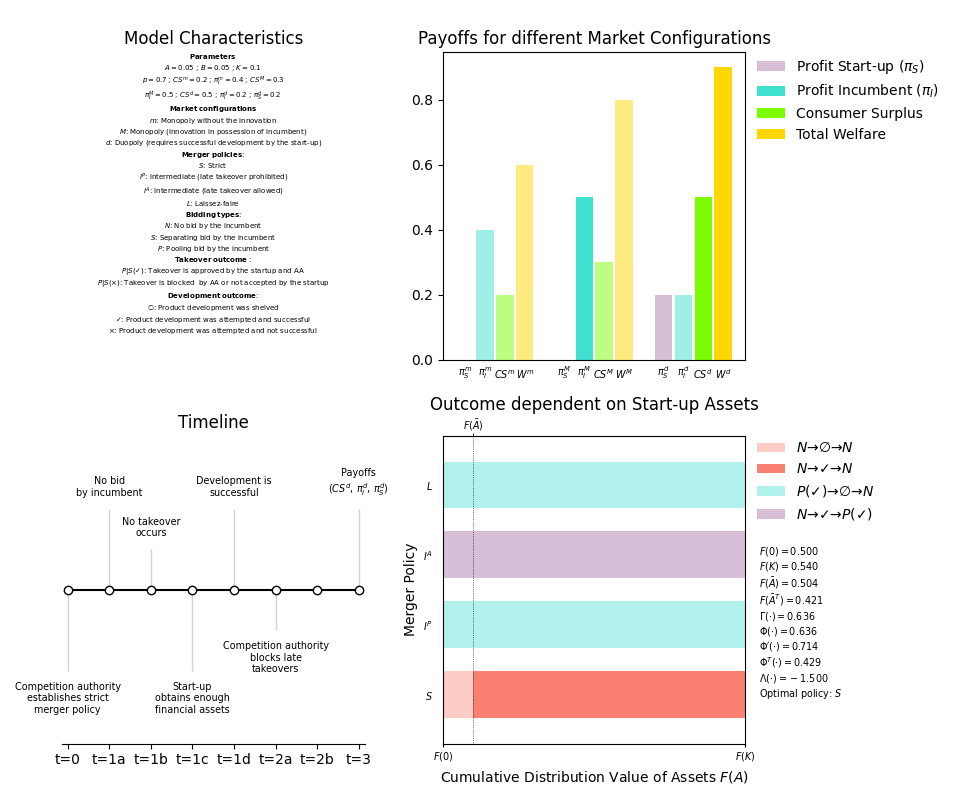

In [2]:
display(grid)